<a href="https://colab.research.google.com/github/bellepoque7/2023-data-science-edu/blob/main/cifar10_autoencoder_%EC%9E%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

설명
- cifar10을 이용한 오토 인코더 재현
- 기존 첫번째 autoencoder를 사용하면 gray scale로 결과나옴
- 두번째 autoencoder를 사용하여 재현 성공

In [1]:
import os
from datetime import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential , Model
from tensorflow.keras.layers import Dense, RNN,LSTM
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.layers import Input,Flatten,Reshape
from tensorflow.keras.layers import Activation, Dropout,BatchNormalization
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import cifar10
from keras import backend as K

In [2]:
(x_train, _), (x_test, _) = cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

In [6]:
#시각화 함수
def plot_mnist(data, p_row, p_col, size, title = False):
    fig,axis = plt.subplots(p_row, p_col, figsize = (p_col*size, p_row*size),
                          subplot_kw = {'xticks':[],'yticks':[]},
                          gridspec_kw = dict(hspace=0.1,wspace=0.1))
    for i , ax in enumerate(axis.flat):
        ax.imshow(data[i],cmap = 'gray')
    if title:
        fig.suptitle(title)

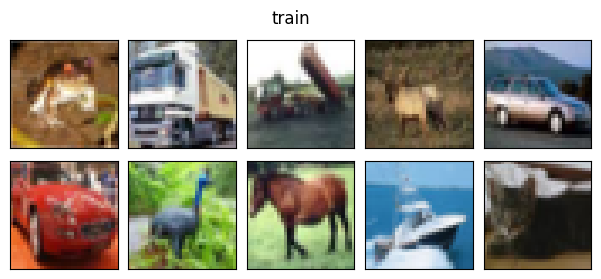

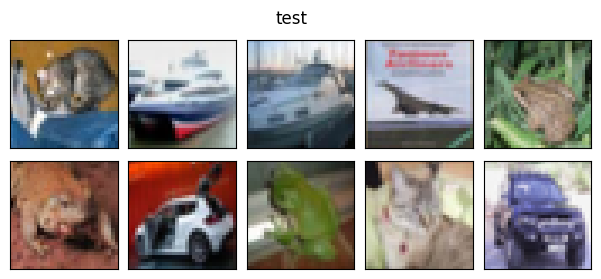

In [7]:
plot_mnist(x_train[:10].reshape(10,32,32,3),2,5,1.5,'train')
plot_mnist(x_test[:10].reshape(10,32,32,3),2,5,1.5,'test')

- gray 결과나왔던 첫 번째 아키텍쳐 -> deprecated

In [8]:
# model = Sequential()

# #1st convolution layer
# model.add(Conv2D(16, (3, 3) #16 is number of filters and (3, 3) is the size of the filter.
#     , padding='same', input_shape=(32,32,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# #2nd convolution layer
# model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2), padding='same'))

# #-------------------------

# #3rd convolution layer
# model.add(Conv2D(2,(3, 3), padding='same')) # apply 2 filters sized of (3x3)
# model.add(Activation('relu'))
# model.add(UpSampling2D((2, 2)))

# #4rd convolution layer
# model.add(Conv2D(16,(3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(UpSampling2D((2, 2)))

# #-------------------------

# model.add(Conv2D(3,(3, 3), padding='same'))
# model.add(Activation('sigmoid'))

# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        448       
                                                                 
 activation (Activation)     (None, 32, 32, 16)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 2)         290       
                                                                 
 activation_1 (Activation)   (None, 16, 16, 2)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 2)          0         
 2D)                                                    

In [9]:
# model_name = 'ae_conv_pool'
# loss_l = ['binary_crossentropy',['cosine_similarity','mse','mae']]
# tf.random.set_seed(314)
# fl = [50,100,100,50] #filter 가중치 깊이
# ks = [(4,4),(2,2),(2,2),(2,2)] #kernel 학습 가중치 행렬
# pl=[(2,2),(2,2)] #pooling 행렬크기
# ot = [1,(2,2)] #출력 레이어 filter와 kernel
# hu =[400] # 중각 레이어 차원수
# n_xaxis = 32
# n_yaxis = 32
# n_axis = 3



In [10]:
# input_ = Input(shape =(n_xaxis,n_yaxis,n_axis) )
# encode_1 = Conv2D(filters = fl[0], kernel_size = ks[0],strides = (1,1),activation= 'relu',padding = 'same',name = 'Encoder_1')(input_)
# maxpool_1 = MaxPooling2D(pl[0], padding = 'same', name ='En_pooling_1')(encode_1)
# encode_2 = Conv2D(fl[1], ks[1],activation = 'relu',padding = 'same',name = 'Encoder_2')(maxpool_1)
# encode_3 = Conv2D(fl[2], ks[2],activation = 'relu',padding = 'same',name = 'Encoder_3')(encode_2)
# maxpool_2 = MaxPooling2D(pl[1], padding = 'same', name ='En_pooling_2')(encode_3)
# encode_4 = Conv2D(fl[3], ks[3],activation = 'relu',padding = 'same',name = 'Encoder_4')(maxpool_2)
# center_shape = encode_4.get_shape().as_list()

# flatten_1 = Flatten(name = 'flatten')(encode_4)
# dense_1 = (Dense(units = hu[0], activation = 'sigmoid', name = 'Encoder_5'))(flatten_1)
# dense_2 = (Dense(units = np.prod(center_shape[1:]), activation = 'relu', name = 'Decoder_5'))(dense_1)

# reshape_1= Reshape(target_shape = center_shape[1:], name = 'reshape')(dense_2)
# decode_4 = Conv2D(fl[2], ks[3],activation = 'relu',padding = 'same',name = 'Decoder_4')(reshape_1)
# upsampling_1 = UpSampling2D(pl[1], name ='De_pooling_2')(decode_4)
# decode_3 = Conv2D(fl[1], ks[2],activation = 'relu',padding = 'same',name = 'Decoder_3')(upsampling_1)
# decode_2 = Conv2D(fl[0], ks[1],activation = 'relu',padding = 'same',name = 'Decoder_2')(decode_3)
# upsampling_2 = UpSampling2D(pl[0], name ='De_pooling_1')(decode_2)

# output_ = Conv2D(3,ks[0],activation= 'sigmoid', padding ='same', name = 'Decoder_1')(upsampling_2)

In [11]:
# model = Model(inputs = input_, outputs= output_, name = model_name)
# optimizer = Adam(0.001)

In [12]:
# model.compile(loss = loss_l[0], optimizer = optimizer, metrics = loss_l[1])

In [13]:
# model.summary()

In [ ]:
# model.compile(optimizer='adadelta', loss='binary_crossentropy')

# model.fit(x_train, x_train
#     , epochs=20
#     , validation_data=(x_test, x_test)
# )

- 제대로 작동하는 두번째 오토인코더 아키텍처

In [15]:
input_layer = Input(shape=(32, 32, 3,))
hidden_encoding = Conv2D(
    32, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(input_layer)
encoded = MaxPooling2D((2, 2))(hidden_encoding)
hidden_decoding = Conv2D(
    32, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='relu',
    padding='same', # How to apply the weights to the images
)(encoded)
upsample_decoding = UpSampling2D((2, 2))(hidden_decoding)
decoded = Conv2D(
    3, # Number of layers or filters in the weight matrix
    (3, 3), # Shape of the weight matrix
    activation='sigmoid',
    padding='same', # How to apply the weights to the images
)(upsample_decoding)
autoencoder = Model(input_layer, decoded)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 up_sampling2d_2 (UpSampling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 3)         867   

In [16]:
autoencoder.compile(loss='binary_crossentropy',
              optimizer='adadelta')

In [17]:
autoencoder.fit(x_train, x_train
    , epochs=20
    , validation_data=(x_test, x_test)
)

Epoch 1/20
1563/1563 [==============================] - 19s 5ms/step - loss: 0.6879 - val_loss: 0.6861
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6853 - val_loss: 0.6840
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6833 - val_loss: 0.6820
Epoch 4/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6813 - val_loss: 0.6799
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6790 - val_loss: 0.6774
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6763 - val_loss: 0.6743
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6730 - val_loss: 0.6709
Epoch 8/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6693 - val_loss: 0.6668
Epoch 9/20
1563/1563 [==============================] - 7s 5ms/step - loss: 0.6648 - val_loss: 0.6620
Epoch 10/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.65

In [23]:
restored_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


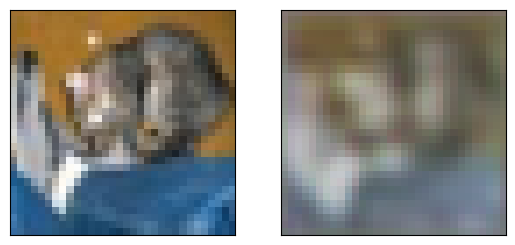

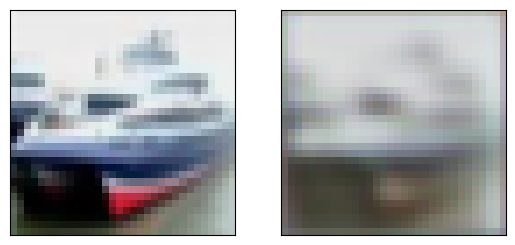

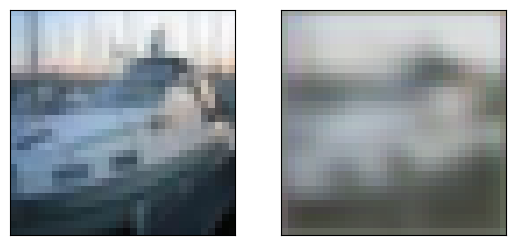

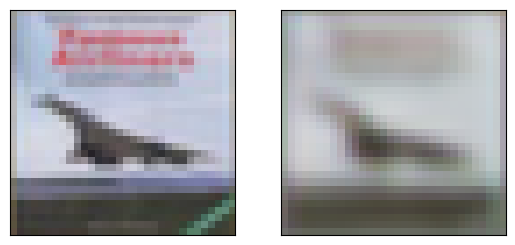

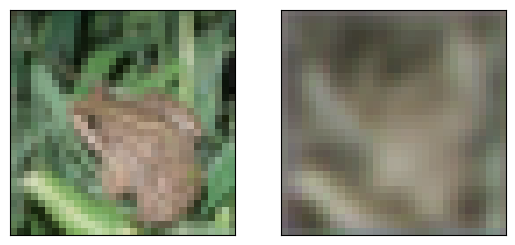

In [24]:
for i in range(5):
    fig, axes = plt.subplots(1,2)
    axes[0].imshow(x_test[i].reshape(32,32,3))
    axes[1].imshow(restored_imgs[i].reshape(32,32,3))

    axes[0].get_xaxis().set_visible(False)
    axes[0].get_yaxis().set_visible(False)
    axes[1].get_xaxis().set_visible(False)
    axes[1].get_yaxis().set_visible(False)